In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

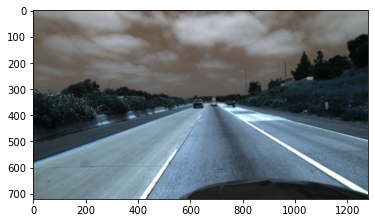

In [27]:
src = cv2.imread('test.jpg')
src1 = cv2.GaussianBlur(src,(5,5),0,0)
plt.imshow(src1)

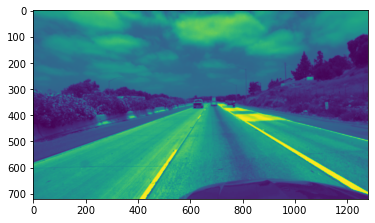

In [28]:
src2 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
plt.imshow(src2)

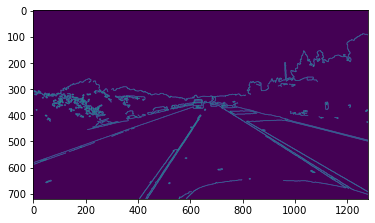

In [29]:
#边缘检测
lthrehlod = 50
hthrehlod =150
src3 = cv2.Canny(src2,lthrehlod,hthrehlod)
plt.imshow(src3)

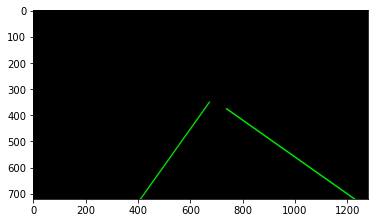

In [281]:
#ROI划定区间,并将非此区间变成黑色
regin = np.array([[(0,src.shape[0]),(760,300),
(500,180),(src.shape[1],src.shape[0])]]) #为啥要两中括号？



#regin1 = np.array([[(0,src.shape[0]),(10,30),
#(50,18),(src.shape[1],src.shape[0])]]) #为啥要两中括号？


mask = np.zeros_like(src3)  
mask_color = 255   #src3图像的通道数是1，且是灰度图像，所以颜色值在0-255
cv2.fillPoly(mask,regin,mask_color)
#cv2.fillPoly(mask,regin1,mask_color)
src4 = cv2.bitwise_and(src3,mask)
plt.imshow(src4)

#利用霍夫变换原理找出上图中的像素点组成的直线，然后画出来
rho = 1
theta = np.pi/180
threhold =15 
minlength = 40
maxlengthgap = 20
lines = cv2.HoughLinesP(src4,rho,theta,threhold,np.array([]),minlength,maxlengthgap)
#画线
linecolor =[0,255,0]
linewidth = 4
src5 = cv2.cvtColor(src4,cv2.COLOR_GRAY2BGR) #转化为三通道的图像
lefts =[]
rights =[]
for line  in lines:
    for x1,y1,x2,y2 in line:
        #cv.line(src5,(x1,y1),(x2,y2),linecolor,linewidth)
        #分左右车道
        k = (y2-y1)/(x2-x1)
        if k<0:
                lefts.append(line)
        else:
                rights.append(line)
plt.imshow(src5)

#优化处理
def choose_lines(lines,threhold):     #过滤斜率差别较大的点
        slope =[(y2-y1)/(x2-x1) for line in lines for x1,x2,y1,y2 in line]
        while len(lines) >0:
                mean = np.mean(slope)   #平均斜率
                diff = [abs(s- mean) for s in slope]
                idx = np.argmax(diff) 
                if diff[idx] > threhold:
                        slope.pop(idx)
                        lines.pop(idx)
                else:
                        break
        
        return lines

def clac_edgepoints(points,ymin,ymax):  #可以理解成找一条线的端点
        x = [p[0] for p in points ]
        y = [p[1] for p in points ]

        k = np.polyfit(y,x,1) 
        func = np.poly1d(k) #方程是y关于x的函数，因为输入的ymin ymax。要求xmin，xmax

        xmin = int(func(ymin))
        xmax= int(func(ymax))

        return[(xmin,ymin),(xmax,ymax)]

good_leftlines = choose_lines(lefts,0.1) #处理后的点
good_rightlines = choose_lines(rights,0.1) 

leftpoints = [(x1,y1) for left in good_leftlines for x1,y1,x2,y2 in left]
leftpoints = leftpoints+[(x2,y2) for left in good_leftlines for x1,y1,x2,y2 in left]
rightpoints = [(x1,y1) for right in good_rightlines for x1,y1,x2,y2 in right]
rightpoints = rightpoints+[(x2,y2) for right in good_rightlines for x1,y1,x2,y2 in right]

lefttop = clac_edgepoints(leftpoints,350,src.shape[0])  # 要画左右车道线的端点
righttop = clac_edgepoints(rightpoints,375,src.shape[0])


src6 = np.zeros_like(src5)

cv2.line(src6,lefttop[0],lefttop[1],linecolor,linewidth)
cv2.line(src6,righttop[0],righttop[1],linecolor,linewidth)


plt.imshow(src6)







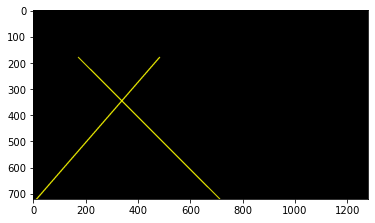

In [310]:
#  !! ROI划定区间,并将非此区间变成黑色

#regin1 = np.array([[(1,src.shape[0]),(500,290),
#(500,180),(src.shape[1],src.shape[0])]])
h = src.shape[1]
w = src.shape[0]
regin1 = np.array([[(500,80),(300,h),
(500,290),(0,w)]])


mask = np.zeros_like(src3)  
mask_color = 255   #src3图像的通道数是1，且是灰度图像，所以颜色值在0-255
cv2.fillPoly(mask,regin1,mask_color)
src10 = cv2.bitwise_and(src3,mask)
plt.imshow(src10)



# !! 利用霍夫变换原理找出上图中的像素点组成的直线，然后画出来
rho = 1
theta = np.pi/180
threhold =15 
minlength = 40
maxlengthgap = 20
lines = cv2.HoughLinesP(src10,rho,theta,threhold,np.array([]),minlength,maxlengthgap)
#画线
linecolor =[255,255,0]
linewidth = 4
src15 = cv2.cvtColor(src10,cv2.COLOR_GRAY2BGR) #转化为三通道的图像
lefts =[]
rights =[]
for line  in lines:
    for x1,y1,x2,y2 in line:
        #cv.line(src5,(x1,y1),(x2,y2),linecolor,linewidth)
        #分左右车道
        k = (y2-y1)/(x2-x1)
        if k<0:
                lefts.append(line)
        else:
                rights.append(line)
plt.imshow(src15)




# !! 优化处理
def choose_lines(lines,threhold):     #过滤斜率差别较大的点
        slope =[(y2-y1)/(x2-x1) for line in lines for x1,x2,y1,y2 in line]
        while len(lines) >0:
                mean = np.mean(slope)   #平均斜率
                diff = [abs(s- mean) for s in slope]
                idx = np.argmax(diff) 
                if diff[idx] > threhold:
                        slope.pop(idx)
                        lines.pop(idx)
                else:
                        break
        
        return lines

def clac_edgepoints(points,ymin,ymax):  #可以理解成找一条线的端点
        x = [p[0] for p in points ]
        y = [p[1] for p in points ]

        k = np.polyfit(y,x,1) 
        func = np.poly1d(k) #方程是y关于x的函数，因为输入的ymin ymax。要求xmin，xmax

        xmin = int(func(ymin))
        xmax= int(func(ymax))

        return[(xmin,ymin),(xmax,ymax)]

good_leftlines = choose_lines(lefts,0.1) #处理后的点
good_rightlines = choose_lines(rights,0.1) 

leftpoints = [(x1,y1) for left in good_leftlines for x1,y1,x2,y2 in left]
leftpoints = leftpoints+[(x2,y2) for left in good_leftlines for x1,y1,x2,y2 in left]
rightpoints = [(x1,y1) for right in good_rightlines for x1,y1,x2,y2 in right]
rightpoints = rightpoints+[(x2,y2) for right in good_rightlines for x1,y1,x2,y2 in right]

lefttop = clac_edgepoints(leftpoints,180,src.shape[0])  # 要画左右车道线的端点
righttop = clac_edgepoints(rightpoints,180,src.shape[0])


src16 = np.zeros_like(src15)

cv2.line(src16,lefttop[0],lefttop[1],linecolor,linewidth)
cv2.line(src16,righttop[0],righttop[1],linecolor,linewidth)


plt.imshow(src16)


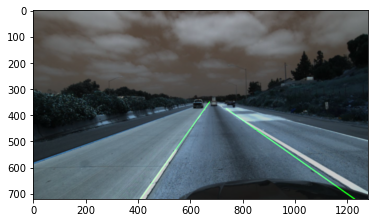

In [234]:
#图像叠加
src7 = cv2.addWeighted(src1,0.8,src6,1,0)
plt.imshow(src7)

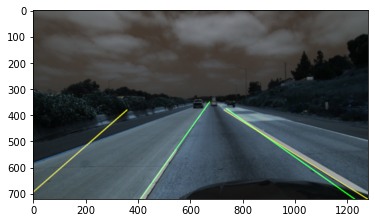

In [300]:
#图像叠加
src17 = cv2.addWeighted(src1,0.8,src16,1,0)
src18 = cv2.addWeighted(src17,0.8,src6,1,0)
plt.imshow(src18)